In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagenerator = ImageDataGenerator(rescale=1.0/255)

In [20]:
train_generator = train_datagenerator.flow_from_directory('C:/Users/vdg/Downloads/caltech-101-img',batch_size=2000,
                                                         target_size=(64,64))

Found 9144 images belonging to 102 classes.


In [22]:
X_train, Y_train = train_generator[0]
X_test, Y_test = train_generator[1]

In [23]:
X_train[0].shape

(64, 64, 3)

In [24]:
from tensorflow.keras.applications import VGG16

In [30]:
model = VGG16(weights="C:/Users/vdg/Downloads/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
              include_top = False, 
              input_shape=(64,64,3))

In [33]:
for layer in model.layers:
   layer.trainable = False

In [47]:
from tensorflow.keras.layers import Flatten,Dense

x = Flatten()(model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

In [53]:
from tensorflow.keras.models import Model
model = Model(inputs=model.input,outputs=predictions) 

In [55]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
model.fit(X_train,Y_train, epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
63/63 [==============================] - 99s 2s/step - loss: 3.1178 - accuracy: 0.3310 - val_loss: 2.9523 - val_accuracy: 0.3600
Epoch 2/10
63/63 [==============================] - 134s 2s/step - loss: 2.4208 - accuracy: 0.4835 - val_loss: 2.5061 - val_accuracy: 0.4470
Epoch 3/10
63/63 [==============================] - 138s 2s/step - loss: 1.9316 - accuracy: 0.5795 - val_loss: 2.2593 - val_accuracy: 0.5095
Epoch 4/10
63/63 [==============================] - 123s 2s/step - loss: 1.6012 - accuracy: 0.6345 - val_loss: 2.1067 - val_accuracy: 0.5110
Epoch 5/10
63/63 [==============================] - 112s 2s/step - loss: 1.3493 - accuracy: 0.6985 - val_loss: 2.0141 - val_accuracy: 0.5325
Epoch 6/10
63/63 [==============================] - 111s 2s/step - loss: 1.1465 - accuracy: 0.7490 - val_loss: 1.9559 - val_accuracy: 0.5340
Epoch 7/10
63/63 [==============================] - 115s 2s/step - loss: 0.9929 - accuracy: 0.7925 - val_loss: 1.8855 - val_accuracy: 0.5565
Epoch 8/10
63/

In [82]:
predicted_value = model.predict(X_test)

63/63 [==============================] - 47s 749ms/step


In [66]:
train_generator.class_indices.keys()

dict_keys(['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 's

In [97]:
predicted_value

array([[9.6111442e-04, 1.2639467e-05, 3.0025205e-04, ..., 2.8983463e-04,
        2.4443547e-05, 1.3398947e-08],
       [7.1249288e-03, 1.1537762e-04, 7.8824756e-05, ..., 2.1994149e-06,
        2.5662368e-06, 1.0050313e-08],
       [6.8613538e-03, 1.3815082e-06, 4.2662734e-05, ..., 2.2987970e-05,
        9.2004244e-05, 1.1386302e-06],
       ...,
       [1.0854675e-01, 1.9416041e-04, 2.4414911e-05, ..., 5.4044969e-04,
        7.6270226e-04, 3.7958046e-06],
       [1.5921799e-03, 3.4497445e-04, 6.1912631e-04, ..., 3.3533853e-04,
        1.8253255e-05, 3.6746599e-07],
       [2.5328781e-02, 4.9650189e-03, 3.2337401e-03, ..., 1.3856438e-04,
        2.4875356e-02, 5.1598740e-03]], dtype=float32)

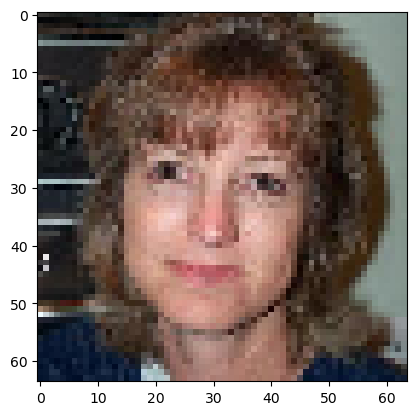

In [108]:
import matplotlib.pyplot as plt
import numpy as np

labels = train_generator.class_indices.keys()

plt.imshow(X_test[4])
m = np.argmax(predicted_value[4])
